In [1]:
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252')

NameError: name 'pd' is not defined

In [8]:
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252')

In [24]:
car_sales_data.head(100)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00,van,162,1.80,Diesel,yes,2012,B 180,front
5,Nissan,16600.00,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
6,Honda,6500.00,sedan,199,2.00,Petrol,yes,2003,Accord,front
7,Renault,10500.00,vagon,185,1.50,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.00,sedan,146,1.80,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.00,sedan,125,2.20,Diesel,yes,2010,E-Class,rear
10,Nissan,20447.15,crossover,0,1.20,Petrol,yes,2016,Qashqai,front


In [4]:
car_sales_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [12]:
#lets check for duplicates
duplicate = car_sales_data[car_sales_data.duplicated()]
len(duplicate)

113

In [14]:
#drop duplicates
car_sales_data = car_sales_data.drop_duplicates()
len(car_sales_data)

9463

In [15]:
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
car             9463 non-null object
price           9463 non-null float64
body            9463 non-null object
mileage         9463 non-null int64
engV            9029 non-null float64
engType         9463 non-null object
registration    9463 non-null object
year            9463 non-null int64
model           9463 non-null object
drive           8953 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [16]:
#check missing values
car_sales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [19]:
car_sales_data.dropna(subset=['drive'], inplace = True)

In [20]:
car_sales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [22]:
#checking the number of unique car registrations
car_sales_data['car'].nunique()

83

In [23]:
car_sales_data['year'].nunique()

54

In [33]:
groupby_avg = pd.DataFrame(car_sales_data.groupby('car')['model'].nunique()) #number of unique models per car

In [34]:
groupby_avg.head(100)

,model
car,
Acura,5
Alfa Romeo,6
Aro,1
Aston Martin,2
Audi,20
BMW,48
BYD,3
Bentley,4
Bogdan,1


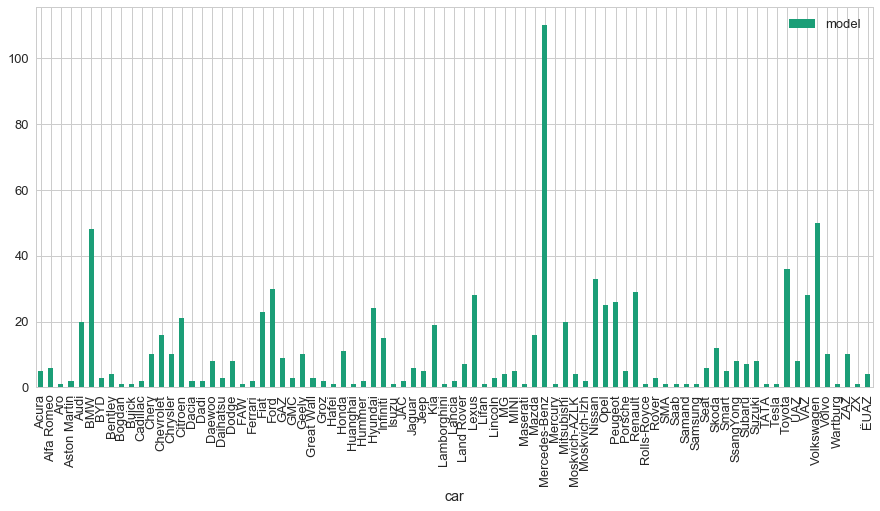

In [35]:
groupby_avg.plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

In [31]:
groupby_avg.describe()

,model
count,83.00
mean,10.48
std,15.58
min,1.00
25%,2.00
50%,5.00
75%,11.50
max,110.00


In [32]:
#total price per car

groupby_car = pd.DataFrame(car_sales_data.groupby('car')['price'].sum())
groupby_car

,price
car,
Acura,241207.00
Alfa Romeo,99449.00
Aro,3600.00
Aston Martin,315000.00
Audi,7662301.55
BMW,13928198.25
BYD,56799.00
Bentley,2490075.00
Bogdan,9900.00


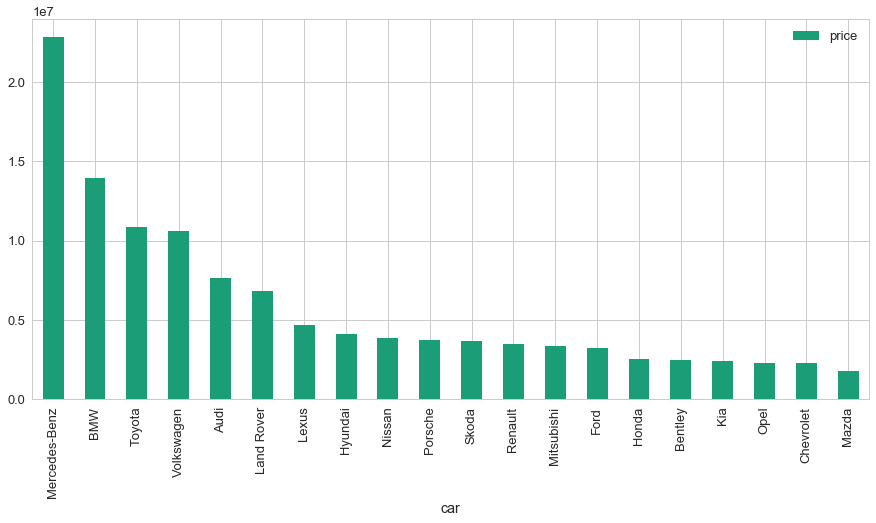

In [38]:
groupby_car.sort_values(by = 'price', ascending=False).head(20).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)